### **다중 회귀**

In [1]:
import pandas as pd


# 데이터 준비

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
import numpy as np

# 타겟 데이터
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

### **사이킷런의 변환기** ###

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공  

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# fit([[]]): 특성을 변환하기 위한 폼을 학습
# transform([[]]): 특성을 변환
# 즉, [2, 3]이라는 특성을 학습하여, 6개의 특성을 만들어낸다

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [6]:
poly = PolynomialFeatures(include_bias=False)

# 특성을 변환하기 위한 폼을 학습
poly.fit(train_input)
# 특성을 변환
train_poly = poly.transform(train_input)

# 특성의 개수
print(train_poly.shape)

(42, 9)


In [7]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [8]:
# 테스트 세트 변환
test_poly = poly.transform(test_input)

### **다중 회귀 모델 훈련하기** ###

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [10]:
# 테스트 세트 점수

print(lr.score(test_poly, test_target))

0.971455991159406


과소 적합 문제를 해결하였다. 만약 특성을 더 추가해보면?

In [11]:
poly = PolynomialFeatures(degree=5, include_bias=False)

# 특성을 변환하기 위한 폼을 학습
# 3제곱, 4제곱, 5제곱까지 변환
poly.fit(train_input)

# 특성을 변환
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성의 개수
print(train_poly.shape)

(42, 55)


In [12]:
# 훈련 세트 점수
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

# 테스트 세트 점수
print(lr.score(test_poly, test_target))

0.9999999999998099
-144.40606225090627


모델이 너무 과대적합되어, -144라는 큰 음수가 나오게 되었다.  
너무 훈련 세트에 완벽하게 학습해버렸기 때문이다

### **규제** ###

규제란, 모델이 훈련세트를 너무 과도하게 학습하지 못하도록 훼방하는 것  
즉, 모델이 훈련세트에 과대적합되지 않도록 만드는 것이다  
선형 회귀 모델의 경우, 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일

In [13]:
# 스케일링

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

선형 회귀 모델에 규제를 추가한 모델을 각각 릿지와 라쏘라고 부른다  
- 릿지: 계수를 제곱한 값을 기준으로 규제를 적용  
- 라쏘: 계수의 절댓값을 기준으로 규제를 적용  
  
일반적으로는 릿지를 조금 더 선호

### **릿지 회귀** ###

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

# 훈련 세트 점수
print(ridge.score(train_scaled, train_target))
# 테스트 세트 점수
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615391


규제의 양을 임의로 조절 가능하다!  
  
모델 객체를 만들 때, alpha 매개 변수로 규제의 강도를 조절하는데  
alpha 값이 크면, 규제 강도가 세지므로 계수값을 더 줄이고 조금더 과소적합되도록 유도한다  
alpha 값이 작으면, 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다
  
  
* 사람이 지정해야하는 매개변수를 **하이퍼파라미터**라고 부른다 
  
  
적절한 alpha 값을 찾기 위해서는 $R^2$ 값의 그래프를 그려보면 된다  
훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 된다


In [15]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [16]:
# alpha list는 릿지 모델의 alpha 값을 정하는 리스트
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

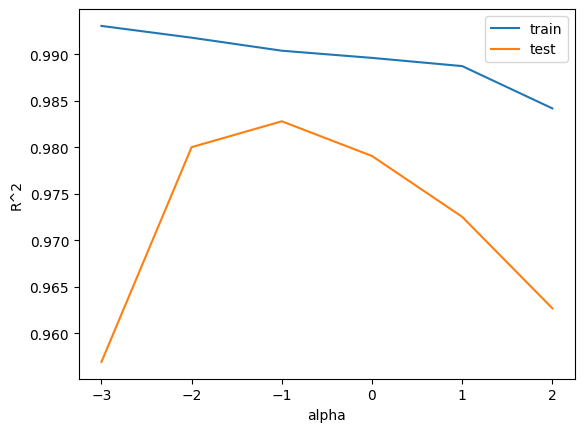

In [19]:
# alpha값을 0.001부터 10배씩 늘렸기 때문에, 그래프 왼쪽이 너무 촘촘해짐
# 로그 스케일로 그래프를 그림

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train', 'test'])
plt.show()

적절한 alpha 값을 찾으려면, 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 지점을 찾아야 함  
가장 높은 -1, 즉 $10^{-1}=0.1$ 이다

In [20]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

# 훈련 세트 점수
print(ridge.score(train_scaled, train_target))
# 테스트 세트 점수
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386918


### **라쏘 회귀** ###

In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

# 오버피팅을 잘 억제함을 보여준다

0.989789897208096
0.9800593698421884


In [23]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/Users/kimjisu/opt/anaconda3/envs/MLDL/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Users/kimjisu/opt/anaconda3/envs/MLDL/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


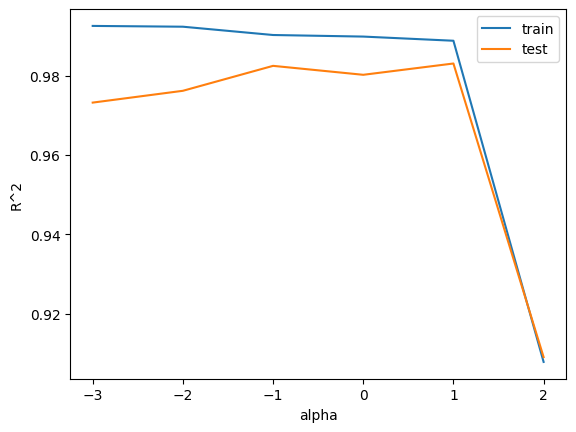

In [24]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train', 'test'])
plt.show()

적절한 alpha 값을 찾으려면, 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 지점을 찾아야 함은 릿지와 같다.  
하지만 가장 오른쪽은 점수가 모두 떨어지므로, 해당 지점은 분명히 과소적합되는 모델이다.  
가장 높은 1, 즉 $10^1=10$ 이다

In [25]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131866
0.9824470598706695


In [26]:
# 계수가 0인 것의 개수
print(np.sum(lasso.coef_ == 0))

40


40개의 계수가 0이 되었다.  
55개 특성 중, 라쏘 모델이 사용한 특성은 15개밖에 되지 않는다  
-> 이는 라쏘 모델을 유용한 특성을 골라내는 용도로도 사용할 수 있음을 보여준다